In [1]:
#Directly importing datasets from Kaggle

## 1) Using Linux commands
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

## 2) Importing datasets using API
!kaggle datasets download -d uciml/indian-liver-patient-records

## 3) Extracting the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/indian-liver-patient-records.zip')
zip_ref.extractall('/content')
zip_ref.close()


In [7]:
## Using pycaret which is good for automating simple tasks
!pip install pycaret

  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 7.17MB/s]


In [10]:
## Importing required libraries and downloads datasets from the sample
import pycaret
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')
# from pycaret.datasets import get_data


In [31]:
# Importing the dataset and exploring them
df = pd.read_csv('/content/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
df.shape

(583, 11)

In [33]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [34]:
#Checking for null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [35]:
## Finding those datasets with Null value
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [66]:
# Data preprocessing
# 1. Coding Gender into category
df["Gender"] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [69]:
# 2. Filling the null values with median
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [123]:
## 3. Replacing 'Dataset' column with 0 and 1 instead of 1 and 2
df['Dataset'].replace(1, 0, inplace = True)
df['Dataset'].replace(2, 1, inplace = True)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,1


In [124]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [71]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [125]:
## train test split using .sample method
df_train = df.sample(frac=0.80, random_state=42).reset_index(drop=True)
# test data
df_test= dataset.drop(df.index).reset_index(drop=True)



In [126]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [127]:
print("Data for Modeling :" + str(x_train.shape))
print("###########"*10)
print("Unseen Data for Prediction :" + str(x_test.shape))

Data for Modeling :(466, 10)
##############################################################################################################
Unseen Data for Prediction :(117, 10)


In [128]:
x_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
77,68,0,0.6,0.1,1620,95,127,4.6,2.1,0.8
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0
210,28,1,0.8,0.3,190,20,14,4.1,2.4,1.4
192,60,1,2.3,0.6,272,79,51,6.6,3.5,1.1
449,48,0,0.9,0.2,173,26,27,6.2,3.1,1.0


In [129]:
y_test.tail()

516    0
305    1
167    0
312    1
329    1
Name: Dataset, dtype: int64

In [83]:
## For some reason numpy is not working on newer versions of numba in google colab
!pip install numba==0.54

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 7.6 MB/s 
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [90]:
## importing everything from pycaret.classification
from pycaret.classification import *
## To give interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [130]:
# exp_clf1 = setup(data = df_train, target = 'Dataset', session_id = 1)
exp_clf2 = setup(data = df_train, target = 'Dataset', session_id = 2)

,Description,Value
0,session_id,2
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(466, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [131]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7425,0.7649,0.2181,0.5462,0.2963,0.1828,0.2188,0.420
dummy,Dummy Classifier,0.7332,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.013
lda,Linear Discriminant Analysis,0.7303,0.7044,0.0444,0.1333,0.0667,0.0279,0.0231,0.017
ridge,Ridge Classifier,0.7301,0.0000,0.0111,0.0500,0.0182,0.0032,0.0017,0.016
lightgbm,Light Gradient Boosting Machine,0.7235,0.7554,0.3528,0.4823,0.3884,0.2221,0.2340,0.105
ada,Ada Boost Classifier,0.7085,0.7223,0.4458,0.4657,0.4395,0.2476,0.2558,0.096
gbc,Gradient Boosting Classifier,0.7025,0.7166,0.2514,0.4267,0.3023,0.1325,0.1455,0.100
et,Extra Trees Classifier,0.6902,0.7149,0.1958,0.3240,0.2357,0.0703,0.0705,0.458
dt,Decision Tree Classifier,0.6749,0.5902,0.4111,0.4013,0.4006,0.1791,0.1815,0.020
knn,K Neighbors Classifier,0.6691,0.6551,0.3111,0.3669,0.3302,0.1157,0.1185,0.118


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
from sklearn.linear_model import LogisticRegression

In [110]:
## Best parameter and model for the given data as presented by pycaret
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7576,0.7500,0.1111,1.0000,0.2000,0.1538,0.2887
1,0.7879,0.7685,0.4444,0.6667,0.5333,0.4031,0.4170
2,0.7576,0.7130,0.2222,0.6667,0.3333,0.2281,0.2797
3,0.6364,0.6991,0.1111,0.2000,0.1429,-0.0645,-0.0690
4,0.6970,0.7500,0.1111,0.3333,0.1667,0.0351,0.0430
5,0.7576,0.8889,0.2222,0.6667,0.3333,0.2281,0.2797
6,0.6875,0.6425,0.3333,0.4286,0.3750,0.1710,0.1734
7,0.7500,0.7448,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7500,0.8333,0.2500,0.5000,0.3333,0.2000,0.2182


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [134]:
df_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,19,1,1.4,0.8,178,13,26,8.0,4.6,1.30,1
1,12,1,1.0,0.2,719,157,108,7.2,3.7,1.00,0
2,60,1,5.7,2.8,214,412,850,7.3,3.2,0.78,0
3,42,0,0.5,0.1,162,155,108,8.1,4.0,0.90,0
4,40,1,14.5,6.4,358,50,75,5.7,2.1,0.50,0


In [135]:
## prediction of dependant variable using Logistic Regression Model
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [136]:
## Accuracy score of Logistic Regression Model
print('Training_accuracy: ', accuracy_score(y_train, y_pred_train))
print('#########'*10)
print('Test_accuracy: ' , accuracy_score(y_test, y_pred_test))

Training_accuracy:  0.7167381974248928
##########################################################################################
Test_accuracy:  0.7606837606837606


In [137]:
## Cross validatiun
training_accuracy = cross_val_score(lr_model, x_train, y_train, cv =10)
test_accuracy = cross_val_score(lr_model, x_test, y_test, cv = 10)
print(training_accuracy.mean())
print('##########'*10)
print(test_accuracy.mean())

0.7040703052728954
####################################################################################################
0.7424242424242424


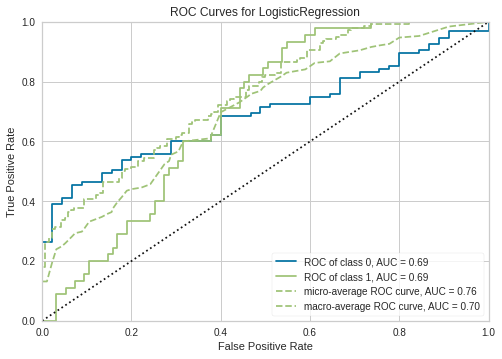

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [138]:
plot_model(lr, plot= 'auc')

In [139]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7576,0.7500,0.1111,1.0000,0.2000,0.1538,0.2887
1,0.7879,0.7731,0.4444,0.6667,0.5333,0.4031,0.4170
2,0.7576,0.7083,0.2222,0.6667,0.3333,0.2281,0.2797
3,0.6970,0.7037,0.2222,0.4000,0.2857,0.1129,0.1208
4,0.6667,0.7407,0.0000,0.0000,0.0000,-0.1101,-0.1555
5,0.7879,0.8935,0.3333,0.7500,0.4615,0.3529,0.3980
6,0.6875,0.6425,0.3333,0.4286,0.3750,0.1710,0.1734
7,0.7812,0.7135,0.1250,1.0000,0.2222,0.1765,0.3111
8,0.7500,0.8281,0.2500,0.5000,0.3333,0.2000,0.2182


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=5.414000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


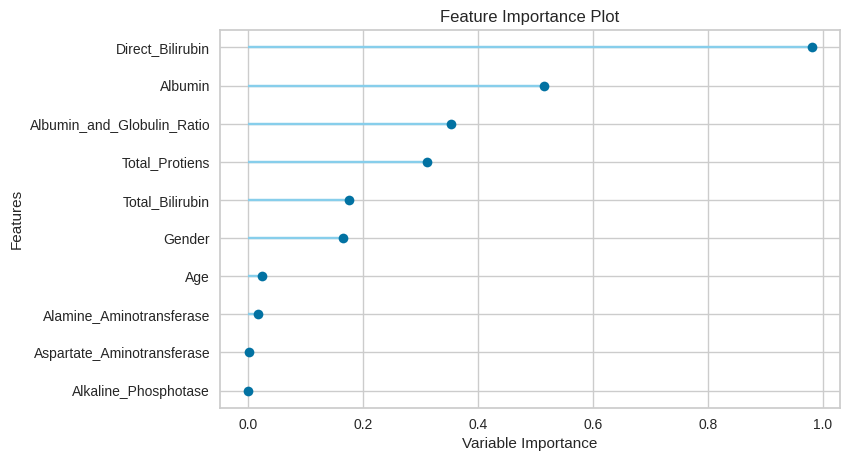

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [141]:
# Most significant feature
plot_model(tuned_lr, plot= 'feature')

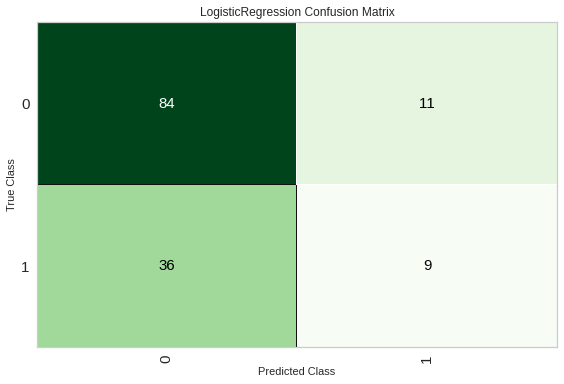

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [143]:
#Confusion matrix
plot_model(tuned_lr, plot= 'confusion_matrix')

In [144]:
# Evalutate the model
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=5.414000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [146]:
save_model(tuned_lr, 'tuned_lr_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=5.414000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=tuned_lr_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Dataset',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=5.414000000000001, class_weight={},
                 